# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np


# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [3]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
north_df.shape

(245, 15)

In [5]:
south_df.shape

(314, 15)

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [6]:
north_df.value_counts('Rep ID').count()


9

In [7]:
south_df.value_counts('Rep ID').count()

11

In [8]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [9]:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [10]:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [11]:
pd.to_datetime(north_df['Time Block']).dt.strftime('%H:%M')
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [12]:
north_time_block = north_df['Time Block'].value_counts().sort_index()
print(north_time_block)

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64


In [13]:
south_time_block = south_df['Time Block'].value_counts().sort_index()
print(south_time_block)

10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64


 EDA Results

Make note of your results here!

1. How many reps are in each branch?
    There are 9 reps in the North Call Center and 11 reps in the South Call Center
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

    AVG MINUTES FOR NORTH CALL CENTER:
    Busy Minutes             9.987755
    Not Ready Minutes        1.914286
    Incoming Wait Time       3.048780
    During Call Wait Time    2.967347
    
    AVG MINUTES FOR SOUTH CALL CENTER:
    Busy Minutes             10.054140
    Not Ready Minutes         1.910828
    Incoming Wait Time        3.000000
    During Call Wait Time     3.076433

3. What is the number of calls taken for each time block?

    NORTH NUMBER OF CALLS FOR EACH TIME BLOCK:
    10:00 AM    43
    11:00 AM    25
    12:00 PM    45
    1:00 PM     17
    2:00 PM     35
    3:00 PM     30
    4:00 PM     28
    5:00 PM     17
    9:00 AM      5
    
    SOUTH NUMBER OF CALLS FOR EACH TIME BLOCK:
    10:00 AM    56
    11:00 AM    31
    12:00 PM    75
    1:00 PM     23
    2:00 PM     30
    3:00 PM     43
    4:00 PM     25
    5:00 PM     26
    9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [15]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [16]:
north_null=north_df.loc[north_df['Incoming Wait Time'].isnull() ,['Incoming or Outgoing','Incoming Wait Time']]
north_null['Incoming or Outgoing'].value_counts()


Outgoing    163
Name: Incoming or Outgoing, dtype: int64

In [17]:
south_null=south_df.loc[south_df['Incoming Wait Time'].isnull() ,['Incoming or Outgoing','Incoming Wait Time']]
south_null['Incoming or Outgoing'].value_counts()


Outgoing    188
Name: Incoming or Outgoing, dtype: int64

In [18]:
north_sale_count = north_df['Sale'].value_counts()
print(north_sale_count)

NO      234
YES      10
YES       1
Name: Sale, dtype: int64


In [19]:
north_df['Sale'] = north_df['Sale'].str.strip()
north_df['Sale'].value_counts()


NO     234
YES     11
Name: Sale, dtype: int64

In [21]:
north_df.loc[north_df.drop('Unnamed: 0', axis=1).duplicated(keep=False), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
49,49,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
50,50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
94,94,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1
105,105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [22]:
north_df_dedupped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()
print(north_df.shape)
print(north_df_dedupped.shape)

north_df.drop('Unnamed: 0', axis=1).duplicated().sum()


(245, 15)
(243, 14)


2

In [23]:
north_df_dedupped.duplicated().sum()

0

In [24]:
south_df.loc[south_df.drop('Unnamed: 0', axis=1).duplicated(keep=False), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
57,57,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
58,58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
166,166,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
170,170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
175,175,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1
180,180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [25]:
south_df_dedupped = south_df.drop('Unnamed: 0', axis=1).drop_duplicates()
print(south_df.shape)
print(south_df_dedupped.shape)

south_df.drop('Unnamed: 0', axis=1).duplicated().sum()

(314, 15)
(311, 14)


3

In [26]:
south_df_dedupped.duplicated().sum()

0

In [27]:
north_df.drop(['Unnamed: 0'], axis = 1,inplace=True) #Drops Unnamed columns from the dataframe
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [28]:
south_df.drop(['Unnamed: 0'], axis = 1,inplace=True) #Drops Unnamed  columns from the dataframe
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


 Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

   Yes, all the null values for Incoming Wait Time correspond to outgoing calls in both North and South
   
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
    
    There was 1 'YES' value that had an extra space so I stripped the column of any extra blank spaces before or after 
    the string
    
3. Are there duplicates in the two data sets? If there are, how did you handle them?

    2 duplicates found in North and 3 duplicates were found in South.  I deleted the duplicates.

4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

    The 'Unnamed' column is unnecessary so I deleted the column

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [29]:
# Manipulate data here

In [30]:
df = north_df.append(south_df, ignore_index=True)

In [31]:
df.shape

(559, 14)

In [34]:
rep_id_group=df.groupby(['Branch','Rep ID'])
rep_id_group.first()

Call Purpose Time Block Incoming or Outgoing Queue Sale  \
Branch Rep ID                                                               
North  Amanda  Product Support    4:00 PM             Incoming     A   NO   
       Andy          Complaint    2:00 PM             Incoming     A   NO   
       Brent         Complaint    9:00 AM             Incoming     B   NO   
       Cam       Sales Support   11:00 AM             Incoming     A   NO   
       Duke    Product Support    2:00 PM             Incoming     B   NO   
       Joe     Product Support    2:00 PM             Incoming     A   NO   
       Lilly   Product Support    2:00 PM             Incoming     B   NO   
       Todd      Sales Support   11:00 AM             Incoming     B   NO   
       Xander  Product Support    3:00 PM             Incoming     B   NO   
South  Alice     Sales Support   10:00 AM             Incoming     C   NO   
       Eric      Sales Support   10:00 AM             Incoming     C   NO   
       George  Product Support    3:00 PM             Incoming     D   NO   
       Helga   Product Support    3:00 PM             Incoming     D   NO   
       Josh    Product Support    4:00 PM             Incoming     D   NO   
       Karl      Sales Support    1:00 PM             Incoming     D   NO   
       Kate      Sales Support   10:00 AM             Incoming     D   NO   
       Randy   Product Support    2:00 PM             Incoming     D   NO   
       Sandy     Sales Support   12:00 PM             Incoming     C   NO   
       Sharon  Product Support   11:00 AM             Incoming     C   NO   
       Susan     Sales Support   10:00 AM             Incoming     C   NO   

               Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
North  Amanda          0          0            10                  3   
       Andy            0          1             9                  3   
       Brent           0          1             9                  2   
       Cam             0          0            11                  1   
       Duke            0          0            12                  2   
       Joe             0          0             8                  1   
       Lilly           0          0            11                  2   
       Todd            0          0             9                  3   
       Xander          0          0            12                  1   
South  Alice           0          0            12                  1   
       Eric            0          0             8                  2   
       George          0          0             8                  3   
       Helga           0          0             9                  1   
       Josh            0          0            11                  3   
       Karl            0          0             9                  1   
       Kate            0          0             9                  1   
       Randy           0          0            11                  2   
       Sandy           0          0             8                  3   
       Sharon          0          0            10                  1   
       Susan           0          0            10                  2   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
North  Amanda                 1.0                      2      1  
       Andy                   2.0                      4      1  
       Brent                  1.0                      4      1  
       Cam                    1.0                      3      1  
       Duke                   1.0                      2      1  
       Joe                    1.0                      3      1  
       Lilly                  1.0                      3      1  
       Todd                   1.0                      3      1  
       Xander                 2.0                      4      1  
South  Alice

In [167]:
rep_sum = df.groupby(["Branch", "Rep ID"]).agg({"Calls": "sum","Abandoned":"sum"}).sort_values(['Branch','Calls'],ascending=False)
rep_sum

Calls  Abandoned
Branch Rep ID                  
South  Eric       35          0
       Randy      33          1
       Sandy      32          0
       Helga      31          2
       George     29          0
       Kate       29          0
       Karl       28          0
       Josh       26          0
       Susan      26          0
       Sharon     25          1
       Alice      20          0
North  Brent      37          1
       Lilly      30          2
       Duke       29          0
       Todd       29          0
       Joe        26          0
       Cam        24          0
       Xander     24          0
       Amanda     23          1
       Andy       23          3

In [163]:
branch_abandon_rate = df.groupby(["Branch"]).agg({"Abandoned": "mean"})
branch_abandon_rate
print('Percentage of Abandoned Calls by Center: ','\n',round(branch_abandon_rate['Abandoned']*100,2))     

Percentage of Abandoned Calls by Center:  
 Branch
North    2.86
South    1.27
Name: Abandoned, dtype: float64


In [37]:
co_abandon_rate = df.agg({"Abandoned": "mean"})
print('Percentage of Abandoned calls for Company: ', round(co_abandon_rate['Abandoned']*100,2))

Percentage of Abandoned calls for Company:  1.97


In [38]:
df["Incoming Wait Time"].value_counts()

4.0    50
2.0    44
3.0    41
1.0    37
5.0    36
Name: Incoming Wait Time, dtype: int64

In [39]:
north_wait_time = df.loc[(df['Incoming Wait Time']<=2)&(df['Branch']=='North'),'Incoming Wait Time'].value_counts()
north_wait_time.sum()

33

In [40]:
north_tot_incoming = df.loc[(df['Incoming or Outgoing']=='Incoming')&(df['Branch']=='North'),'Calls'].value_counts()
north_tot_incoming.sum()

82

In [41]:
south_wait_time = df.loc[(df['Incoming Wait Time']<=2)&(df['Branch']=='South'),'Incoming Wait Time'].value_counts()
south_wait_time.sum()

48

In [42]:
south_tot_incoming = df.loc[(df['Incoming or Outgoing']=='Incoming')&(df['Branch']=='South'),'Calls'].value_counts()
south_tot_incoming.sum()

126

In [43]:
company_wait_time = df.loc[(df['Incoming Wait Time']<=2),'Incoming Wait Time'].value_counts()
company_wait_time.sum()

81

In [44]:
company_tot_incoming = df.loc[(df['Incoming or Outgoing']=='Incoming'),'Calls'].sum()
company_tot_incoming

208

In [45]:
north_service_level=round((north_wait_time.sum()/north_tot_incoming.sum())*100,2)
north_service_level


40.24

In [46]:
south_service_level=round((south_wait_time.sum()/south_tot_incoming.sum())*100,2)
south_service_level

38.1

In [47]:
company_service_level=round((company_wait_time.sum()/company_tot_incoming.sum())*100,2)
company_service_level

38.94

In [48]:
branch_avg_speed_answer = df.groupby(["Branch"]).agg({"Incoming Wait Time": "mean"})
branch_avg_speed_answer


,Incoming Wait Time
Branch,
North,3.04878
South,3.00000


In [49]:
co_avg_speed_answer = df.agg({"Incoming Wait Time": "mean"})
co_avg_speed_answer


Incoming Wait Time    3.019231
dtype: float64

 Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

    North - Brent
    
    South - Eric
    
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

    Call Abandonment Rate:
        North: 2.86%
        South: 1.27%
        Company: 1.97%
        
    The call abandonment rate does not fall out of the optimal range for either call center.

    
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

    North Service level is 40.24%
    South Service level is 38.1%
    Company Service level is 38.94%


4. For each branch and the entire company, what is the average speed of answer?

    Average Speed of Answer:
        North - 3.04878 seconds
        South - 3 seconds
        Company - 3.019231 seconds


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [50]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [51]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [52]:
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize']=(10,10)

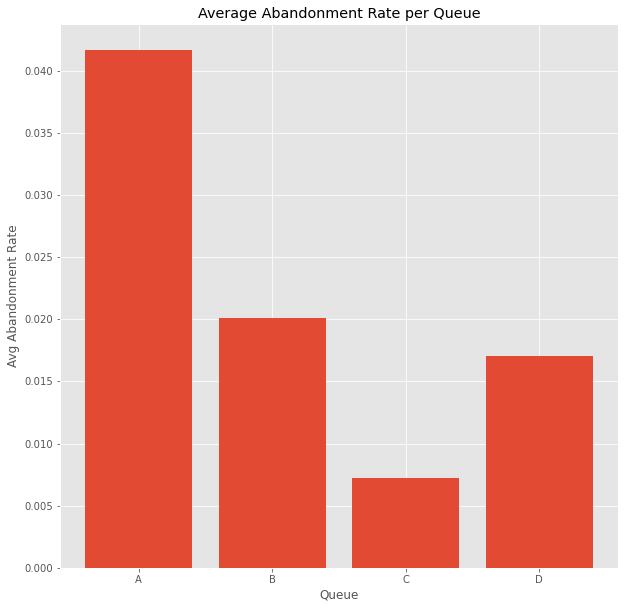

In [53]:
queue = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), rates, tick_label=queue)
plt.title('Average Abandonment Rate per Queue',color = 'black')
plt.xlabel("Queue")
plt.ylabel("Avg Abandonment Rate")

plt.show()

In [155]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df.groupby(["Branch","Rep ID"])["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Branch","Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Branch","Rep ID"]).sum()# Final Table
#quick_stats = quick_stats.sum()

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Branch","Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Branch","Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on=["Branch","Rep ID"]).reset_index()

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100



In [157]:
service_level.groupby('Branch').mean()

,Calls_x,Calls_y,Service Level %
Branch,,,
North,3.666667,9.111111,41.479076
South,4.363636,11.454545,36.198965


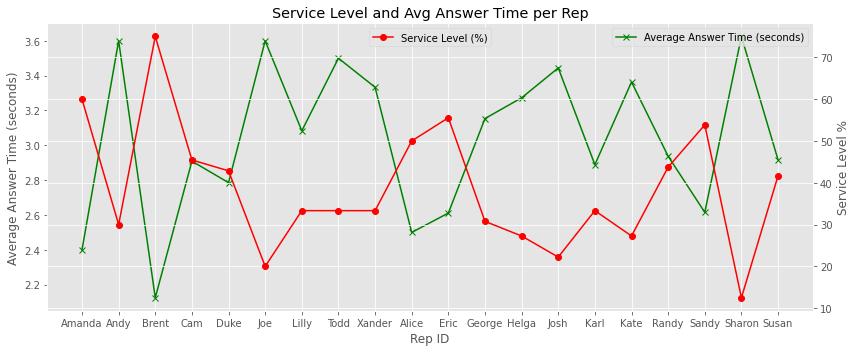

In [56]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Service Level and Avg Answer Time per Rep')
ax.set_xlabel('Rep ID')
ax.plot(north_plt['Rep ID'], north_plt['Incoming Wait Time'], color='green', marker='x')
ax2.plot(service_level['Rep ID'], service_level['Service Level %'], color='red', marker='o')
ax.set_ylabel('Average Answer Time (seconds)')
ax2.set_ylabel('Service Level %')
ax.legend(['Average Answer Time (seconds)'], loc='upper right')
ax2.legend(['Service Level (%)'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [61]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

In [141]:
mycalls = [complaints,sales_support,product_support]
call_purpose_df = pd.concat([pd.Series(d) for d in mycalls], axis=1).fillna(0).T
call_purpose_df.index = ['Complaints', 'Sales Support', 'Product Support']
call_purpose_df.reset_index(inplace=True)
call_purpose_df = call_purpose_df.rename(columns = {'index':'Call Purpose'})
call_purpose_df

,Call Purpose,Incoming,Outgoing
0,Complaints,51.0,0.0
1,Sales Support,75.0,123.0
2,Product Support,82.0,228.0


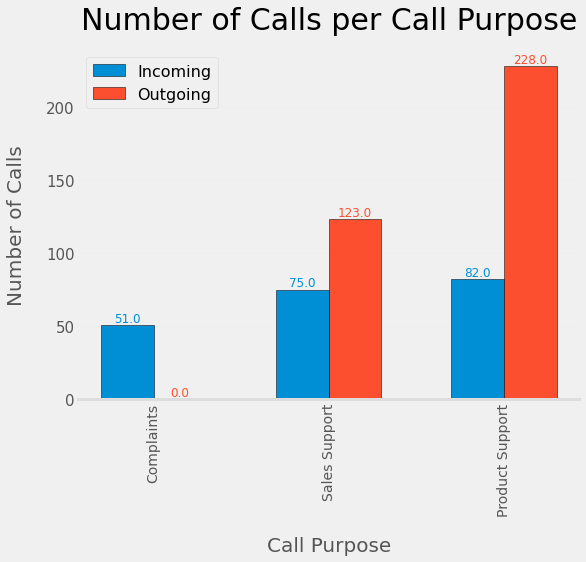

In [154]:

fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = call_purpose_df['Call Purpose']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create our first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width/2,
              call_purpose_df['Incoming'],
              width = width, 
               label = 'Incoming',
               edgecolor = "black"
              )
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
              call_purpose_df['Outgoing'],
              width = width,
              label = 'Outgoing',
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("Number of Calls",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Call Purpose",
             fontsize = 20,
             labelpad =20)
ax.set_title("Number of Calls per Call Purpose",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add totals for each bar
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


 Visualization Results

For each chart you created, explain why you chose the chart style you chose.

1. What is the average abandonment rate per queue? 
    I chose a simple bar chart since it very clearly displays the differences between each queue as far as the abandoment rate for each.  
   

2. What is the service level and average speed of answer per each rep?
   I chose a line chart using a double y-axis.  This chart really compares for each rep how well they performed as compared to the other reps.  The double y-axis shows for each rep both the service level and average speed per answer.
   
3. For each type of call purpose, how many calls are outgoing vs. incoming?  
   I chose a double bar chart.  This chart compares the # of incoming and outgoing calls for each type of call.  I put the actual # of calls on each bar so it easy to see exactly how many call.  This visualization displays this information if a very clean-looking way.
   

 Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

    The South branch is operating more efficiently in that their abandonment rate is quite a bit lower than the North branch.  Their average speed of answer is also lower.  Although the service level percentage is a little higher for the North branch I believe that there is one person who seems to outshine the others which brings the average up quite a bit.

    
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

    The North branch has fewer reps and therefore could use the extra help.  They also are slower to answer the phone and have a higher number of calls hanging up before being answered because of the long wait.


3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
    I may have used more information about how long a rep spent with customers once they called in.  I might also have evaluated more closely the queue per rep.  I also noted the high volume of outgoing calls.  Does the time spent on outgoing calls affect the efficiency of fielding incoming calls?
    

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [166]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
